# Kết nối google drive và import thư viện

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [83]:
!pip install pandas odfpy

# Load dataset

In [84]:
header = ['assignment_id', 'problem_id', 'username','is_final', 'status','pre_score','coefficient','language_id','created_at', 'updated_at','judgements']
df = pd.read_csv("/content/drive/MyDrive/ML/NMLT/annonimized.csv", names=header, header=0)
df

,assignment_id,problem_id,username,is_final,status,pre_score,coefficient,language_id,created_at,updated_at,judgements
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
...,...,...,...,...,...,...,...,...,...,...,...
295193,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,388516cbf597351226be1bdbe5ef30b9dcef570f,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,01-15 16:03:43,01-15 16:03:53,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":..."
295194,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,0,Compilation Error,0,100,it0012,01-15 16:04:07,01-15 16:05:08,"{""times"":[],""mems"":[],""verdicts"":{""\n\nIn func..."
295195,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,01-15 16:04:58,01-15 16:05:08,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":..."
295196,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,8c0f8dd4ff55e1609f733e043ac5e88b1dde6e7c,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,01-15 16:05:13,01-15 16:05:22,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":[0..."


In [85]:
# Định dạng lại kiểu datetime
df['created_at'] = pd.to_datetime('2024-' + df['created_at'], format='%Y-%m-%d %H:%M:%S')
df['updated_at'] = pd.to_datetime('2024-' + df['updated_at'], format='%Y-%m-%d %H:%M:%S')

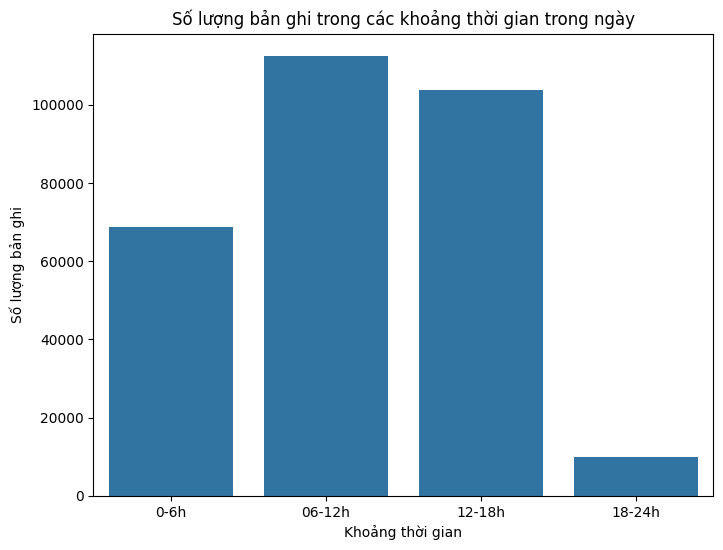

In [86]:
df['created_at_hour'] = df['created_at'].dt.hour
def assign_time_period(hour):
    if 0 <= hour < 6:
        return '0-6h'
    elif 6 <= hour < 12:
        return '06-12h'
    elif 12 <= hour < 18:
        return '12-18h'
    else:
        return '18-24h'

# Áp dụng hàm phân chia khoảng thời gian vào cột giờ
df['time_period'] = df['created_at_hour'].apply(assign_time_period)
time_period_counts = df['time_period'].value_counts().sort_index()

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 6))
sns.barplot(x=time_period_counts.index, y=time_period_counts.values)
plt.title('Số lượng bản ghi trong các khoảng thời gian trong ngày')
plt.xlabel('Khoảng thời gian')
plt.ylabel('Số lượng bản ghi')
plt.show()

# Feature Engineering

In [87]:
so_lan_nop = df.groupby("username").size().reset_index(name='so_lan_nop')

# Hiển thị kết quả
print(so_lan_nop)

                                      username  so_lan_nop
0     00b6dd4fc7eb817e03708c532016ef30ce564a61         147
1     00bef8afee8f3c595d535c9c03c490cac1a4f021         259
2     01122b3ef7e59b84189e65985305f575d6bdf83c         195
3     0134f9f410c65ad0e8c2254a7e9288670e02a183         100
4     013de369c439ab0ead8aa7da64423aa395a8be39         107
...                                        ...         ...
1484  feb8a2859a011c59efd22ed419cb69288fe03627          74
1485  fef4a3263ed9a8ab14d457694bb8fd86ccd98312         260
1486  ff12d6e2ab80696ed8e22fbe5497e96c68d29076         437
1487  ff3fa2ec64294f37ae968159f810ebeda7966c51          94
1488  ffe872165621d735a48bb5db0c71dd5195cba359         399

[1489 rows x 2 columns]


In [88]:
so_lan_nop_success=df[df['status'] == "SCORE"].groupby("username").size().reset_index(name='so_lan_nop_thanh_cong')
print(so_lan_nop_success)

                                      username  so_lan_nop_thanh_cong
0     00b6dd4fc7eb817e03708c532016ef30ce564a61                    119
1     00bef8afee8f3c595d535c9c03c490cac1a4f021                    209
2     01122b3ef7e59b84189e65985305f575d6bdf83c                    175
3     0134f9f410c65ad0e8c2254a7e9288670e02a183                     76
4     013de369c439ab0ead8aa7da64423aa395a8be39                     94
...                                        ...                    ...
1470  feb8a2859a011c59efd22ed419cb69288fe03627                     71
1471  fef4a3263ed9a8ab14d457694bb8fd86ccd98312                    216
1472  ff12d6e2ab80696ed8e22fbe5497e96c68d29076                    360
1473  ff3fa2ec64294f37ae968159f810ebeda7966c51                     74
1474  ffe872165621d735a48bb5db0c71dd5195cba359                    351

[1475 rows x 2 columns]


In [89]:
so_lan_nop_error=df[df['status'] == "Compilation Error"].groupby("username").size().reset_index(name='so_lan_nop_error')
print(so_lan_nop_error)

                                      username  so_lan_nop_error
0     00b6dd4fc7eb817e03708c532016ef30ce564a61                28
1     00bef8afee8f3c595d535c9c03c490cac1a4f021                50
2     01122b3ef7e59b84189e65985305f575d6bdf83c                20
3     0134f9f410c65ad0e8c2254a7e9288670e02a183                24
4     013de369c439ab0ead8aa7da64423aa395a8be39                13
...                                        ...               ...
1423  feb8a2859a011c59efd22ed419cb69288fe03627                 3
1424  fef4a3263ed9a8ab14d457694bb8fd86ccd98312                44
1425  ff12d6e2ab80696ed8e22fbe5497e96c68d29076                77
1426  ff3fa2ec64294f37ae968159f810ebeda7966c51                20
1427  ffe872165621d735a48bb5db0c71dd5195cba359                48

[1428 rows x 2 columns]


In [90]:
diem_tb = df.groupby("username")['pre_score'].mean().reset_index(name='diem_trung_binh')
print(diem_tb)

                                      username  diem_trung_binh
0     00b6dd4fc7eb817e03708c532016ef30ce564a61      5504.149660
1     00bef8afee8f3c595d535c9c03c490cac1a4f021      5488.552124
2     01122b3ef7e59b84189e65985305f575d6bdf83c      5973.753846
3     0134f9f410c65ad0e8c2254a7e9288670e02a183      5952.760000
4     013de369c439ab0ead8aa7da64423aa395a8be39      6474.448598
...                                        ...              ...
1484  feb8a2859a011c59efd22ed419cb69288fe03627      5581.081081
1485  fef4a3263ed9a8ab14d457694bb8fd86ccd98312      6204.557692
1486  ff12d6e2ab80696ed8e22fbe5497e96c68d29076      4998.466819
1487  ff3fa2ec64294f37ae968159f810ebeda7966c51      4343.329787
1488  ffe872165621d735a48bb5db0c71dd5195cba359      6353.769424

[1489 rows x 2 columns]


In [91]:
late_submissions = df[df['coefficient'] < 100]

# Nhóm dữ liệu theo MSSV và đếm số lần nộp bài trễ cho mỗi sinh viên
so_lan_nop_tre = late_submissions.groupby("username").size().reset_index(name='so_lan_nop_tre')
print(so_lan_nop_tre)

                                     username  so_lan_nop_tre
0    013de369c439ab0ead8aa7da64423aa395a8be39               3
1    0155f91fe242fe55e1af631b0f0afbe9938b185c               1
2    052039d5c5915699359b1d549b36ea69330c0ac3              14
3    05b134c1a682085880fb7ce76d221a48955e5b8a              18
4    0a9b6ec3e82e8a2527b21eb3420a6d9b72f4f71e              36
..                                        ...             ...
106  f7875ec1207504a229cd9b5ca132437c6bdd6a4d               7
107  f86b9fba1d59be7c864d4f23d0c7674113a27cab              15
108  f9491b0ab4aee90c428545e0e315a3af1f827595              20
109  f9f4d4ef2a3de006bd037db9eb160ab8e51c79f2              50
110  fcd6e54df612c033e7a465155046b5223ca4eee3               7

[111 rows x 2 columns]


In [92]:
ti_le_nop_tre = df.groupby("username")['coefficient'].apply(lambda x: (x < 100).sum() / len(x) * 100).reset_index(name='ty_le_nop_bai_tre')
print(ti_le_nop_tre)

                                      username  ty_le_nop_bai_tre
0     00b6dd4fc7eb817e03708c532016ef30ce564a61           0.000000
1     00bef8afee8f3c595d535c9c03c490cac1a4f021           0.000000
2     01122b3ef7e59b84189e65985305f575d6bdf83c           0.000000
3     0134f9f410c65ad0e8c2254a7e9288670e02a183           0.000000
4     013de369c439ab0ead8aa7da64423aa395a8be39           2.803738
...                                        ...                ...
1484  feb8a2859a011c59efd22ed419cb69288fe03627           0.000000
1485  fef4a3263ed9a8ab14d457694bb8fd86ccd98312           0.000000
1486  ff12d6e2ab80696ed8e22fbe5497e96c68d29076           0.000000
1487  ff3fa2ec64294f37ae968159f810ebeda7966c51           0.000000
1488  ffe872165621d735a48bb5db0c71dd5195cba359           0.000000

[1489 rows x 2 columns]


In [93]:
test_submissions = df[df['is_final'] == 0]

# Bước 2 và 3: Nhóm dữ liệu theo MSSV và đếm số lần nộp bài thử
so_lan_nop_thu = test_submissions.groupby("username").size().reset_index(name='so_lan_nop_thu')
print(so_lan_nop_thu)

                                      username  so_lan_nop_thu
0     00b6dd4fc7eb817e03708c532016ef30ce564a61             101
1     00bef8afee8f3c595d535c9c03c490cac1a4f021             181
2     01122b3ef7e59b84189e65985305f575d6bdf83c             128
3     0134f9f410c65ad0e8c2254a7e9288670e02a183              53
4     013de369c439ab0ead8aa7da64423aa395a8be39              41
...                                        ...             ...
1464  feb8a2859a011c59efd22ed419cb69288fe03627              40
1465  fef4a3263ed9a8ab14d457694bb8fd86ccd98312             182
1466  ff12d6e2ab80696ed8e22fbe5497e96c68d29076             334
1467  ff3fa2ec64294f37ae968159f810ebeda7966c51              60
1468  ffe872165621d735a48bb5db0c71dd5195cba359             303

[1469 rows x 2 columns]


In [94]:
final_submissions = df[df['is_final'] == 1]

# Bước 2 và 3: Nhóm dữ liệu theo MSSV và tính trung bình điểm
diem_so = final_submissions.groupby("username")['pre_score'].mean().reset_index()
print(diem_so)

                                      username     pre_score
0     00b6dd4fc7eb817e03708c532016ef30ce564a61  10000.000000
1     00bef8afee8f3c595d535c9c03c490cac1a4f021   9647.423077
2     01122b3ef7e59b84189e65985305f575d6bdf83c   9391.253731
3     0134f9f410c65ad0e8c2254a7e9288670e02a183  10000.000000
4     013de369c439ab0ead8aa7da64423aa395a8be39   9176.151515
...                                        ...           ...
1483  feb8a2859a011c59efd22ed419cb69288fe03627  10000.000000
1484  fef4a3263ed9a8ab14d457694bb8fd86ccd98312   9730.769231
1485  ff12d6e2ab80696ed8e22fbe5497e96c68d29076   9943.980583
1486  ff3fa2ec64294f37ae968159f810ebeda7966c51   9230.088235
1487  ffe872165621d735a48bb5db0c71dd5195cba359  10000.000000

[1488 rows x 2 columns]


In [95]:
ti_le_nop_tc = pd.merge(so_lan_nop_error, so_lan_nop_success, on='username', how='outer').fillna(0)

# Tính tổng số lần nộp
ti_le_nop_tc['tong_so_lan_nop'] = ti_le_nop_tc['so_lan_nop_error'] + ti_le_nop_tc['so_lan_nop_thanh_cong']

# Tính tỉ lệ nộp thành công
ti_le_nop_tc['ti_le_nop_thanh_cong'] = ti_le_nop_tc['so_lan_nop_thanh_cong'] / ti_le_nop_tc['tong_so_lan_nop']

ti_le_nop_tc
ti_le_nop_thanh_cong= ti_le_nop_tc[['ti_le_nop_thanh_cong','username']]

In [96]:
df['created_at'] = pd.to_datetime(df['created_at'], format='%m-%d %H:%M:%S',errors='coerce')
df['updated_at'] = pd.to_datetime(df['updated_at'], format='%m-%d %H:%M:%S',errors='coerce')

df['time_spent'] = abs(df['updated_at'] - df['created_at'])
# Chuyển đổi time_spent sang số giây
df['time_spent_hours'] = df['time_spent'].dt.total_seconds()/3600

# Tính tổng thời gian làm bài cho mỗi sinh viên (giả sử mỗi sinh viên có nhiều bản ghi)
total_time_spent = df.groupby('username')['time_spent_hours'].sum().reset_index(name='total_time_spent_hours')
print(total_time_spent)

                                      username  total_time_spent_hours
0     00b6dd4fc7eb817e03708c532016ef30ce564a61              334.646667
1     00bef8afee8f3c595d535c9c03c490cac1a4f021            18129.192222
2     01122b3ef7e59b84189e65985305f575d6bdf83c             6565.662222
3     0134f9f410c65ad0e8c2254a7e9288670e02a183               42.058056
4     013de369c439ab0ead8aa7da64423aa395a8be39                5.470000
...                                        ...                     ...
1484  feb8a2859a011c59efd22ed419cb69288fe03627                4.006944
1485  fef4a3263ed9a8ab14d457694bb8fd86ccd98312              705.149722
1486  ff12d6e2ab80696ed8e22fbe5497e96c68d29076            21049.743611
1487  ff3fa2ec64294f37ae968159f810ebeda7966c51              252.463056
1488  ffe872165621d735a48bb5db0c71dd5195cba359             8845.456944

[1489 rows x 2 columns]


In [97]:
#Tính số lần nộp bài của mỗi user trên mỗi problem
submission_counts = df.groupby(['username', 'problem_id']).size().reset_index(name='total_submissions')

#Tính tổng số lượt nộp bài của mỗi problem
submission_counts['total_submissions_per_problem'] = submission_counts.groupby('problem_id')['total_submissions'].transform('sum')

#Tính tỉ lệ nộp bài trung bình mỗi problem của user trên tổng số
submission_counts['average_submission_ratio'] = submission_counts['total_submissions'] / submission_counts['total_submissions_per_problem']
#print(submission_counts)

#Tỉ lệ nộp bài mỗi sanh diên
average_submission_ratio_per_user = submission_counts.groupby('username')['average_submission_ratio'].mean().reset_index()
print(average_submission_ratio_per_user)

                                      username  average_submission_ratio
0     00b6dd4fc7eb817e03708c532016ef30ce564a61                  0.002048
1     00bef8afee8f3c595d535c9c03c490cac1a4f021                  0.002319
2     01122b3ef7e59b84189e65985305f575d6bdf83c                  0.060149
3     0134f9f410c65ad0e8c2254a7e9288670e02a183                  0.000886
4     013de369c439ab0ead8aa7da64423aa395a8be39                  0.001457
...                                        ...                       ...
1484  feb8a2859a011c59efd22ed419cb69288fe03627                  0.043319
1485  fef4a3263ed9a8ab14d457694bb8fd86ccd98312                  0.028905
1486  ff12d6e2ab80696ed8e22fbe5497e96c68d29076                  0.002176
1487  ff3fa2ec64294f37ae968159f810ebeda7966c51                  0.002121
1488  ffe872165621d735a48bb5db0c71dd5195cba359                  0.001678

[1489 rows x 2 columns]


In [98]:
final_submissions = df[df['is_final'] == 1]
final_submissions = final_submissions.groupby("username").size().reset_index(name='final_submission_number')
avg_final_submission_per_user = final_submissions.groupby('username')['final_submission_number'].mean().reset_index()

# Đổi tên cột để dễ hiểu
avg_final_submission_per_user.columns = ['username', 'avg_final_submission_number']

# Kết quả
print(avg_final_submission_per_user)

                                      username  avg_final_submission_number
0     00b6dd4fc7eb817e03708c532016ef30ce564a61                         46.0
1     00bef8afee8f3c595d535c9c03c490cac1a4f021                         78.0
2     01122b3ef7e59b84189e65985305f575d6bdf83c                         67.0
3     0134f9f410c65ad0e8c2254a7e9288670e02a183                         47.0
4     013de369c439ab0ead8aa7da64423aa395a8be39                         66.0
...                                        ...                          ...
1483  feb8a2859a011c59efd22ed419cb69288fe03627                         34.0
1484  fef4a3263ed9a8ab14d457694bb8fd86ccd98312                         78.0
1485  ff12d6e2ab80696ed8e22fbe5497e96c68d29076                        103.0
1486  ff3fa2ec64294f37ae968159f810ebeda7966c51                         34.0
1487  ffe872165621d735a48bb5db0c71dd5195cba359                         96.0

[1488 rows x 2 columns]


In [99]:
# Sắp xếp dữ liệu theo 'username', 'problem_id', và 'created_at'
df = df.sort_values(by=['username', 'problem_id', 'created_at'])

# Gán thứ tự nộp bài cho mỗi 'problem_id' của mỗi 'username'
df['submission_number'] = df.groupby(['username', 'problem_id']).cumcount() + 1

# Xác định lần nộp 'is_final' là lần nộp thứ mấy
df['final_submission_number'] = df.apply(lambda row: row['submission_number'] if row['is_final'] == 1 else None, axis=1)

# Lọc các giá trị null trong 'final_submission_number' và giữ lại duy nhất một giá trị cho mỗi 'username', 'problem_id'
final_submissions = df.dropna(subset=['final_submission_number']).drop_duplicates(subset=['username', 'problem_id'])

# Kết quả
print(final_submissions[['username', 'problem_id', 'final_submission_number']])


                                        username  \
173003  00b6dd4fc7eb817e03708c532016ef30ce564a61   
173001  00b6dd4fc7eb817e03708c532016ef30ce564a61   
173037  00b6dd4fc7eb817e03708c532016ef30ce564a61   
172970  00b6dd4fc7eb817e03708c532016ef30ce564a61   
172991  00b6dd4fc7eb817e03708c532016ef30ce564a61   
...                                          ...   
159760  ffe872165621d735a48bb5db0c71dd5195cba359   
159848  ffe872165621d735a48bb5db0c71dd5195cba359   
159849  ffe872165621d735a48bb5db0c71dd5195cba359   
159845  ffe872165621d735a48bb5db0c71dd5195cba359   
159826  ffe872165621d735a48bb5db0c71dd5195cba359   

                                      problem_id  final_submission_number  
173003  008f8e9b0f4fac6b5f188f0dc8d118a8b19aabee                      1.0  
173001  10ef40cac132f24608f893c45f1452173e00e0b6                      1.0  
173037  11cff2e1cb6f229a49b9be40225764aa6a38508f                      1.0  
172970  1d824e02c40fecdae25d89c0357410997dfbf799                      1

In [100]:
# Lọc các bài có is_final status = 1
final_df = df[df['is_final'] == 1]

# Tính điểm cho mỗi problem_id
final_df['score'] = final_df['pre_score'] * (final_df['coefficient'] / 100)

# Tính tổng điểm của từng username cho mỗi assignment_id
groupby_assignment_df = final_df.groupby(['assignment_id', 'username'])['score'].sum().reset_index()

# Tính số problem_id cho từng assignment_id và username
count_problems = final_df.groupby(['assignment_id', 'username']).size().reset_index(name='problem_count')

# Gộp các tổng điểm và số problem_id lại với nhau
tb_diem_assignment = pd.merge(groupby_assignment_df, count_problems, on=['assignment_id', 'username'])

# Tính điểm trung bình của từng username cho mỗi assignment_id
tb_diem_assignment['average_score'] = tb_diem_assignment['score'] / tb_diem_assignment['problem_count']

# Lấy kết quả cần thiết
avg_score_per_asignment = tb_diem_assignment[[ 'username', 'average_score']]

avg_score_per_asignment

<ipython-input-100-8c22ae123e53>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['score'] = final_df['pre_score'] * (final_df['coefficient'] / 100)


,username,average_score
0,020ef1c31cb4751bbfa1a88fba782db3c402e2fa,10000.000000
1,0538762f44e8dfb07dc26c8c771f06080b9b2dee,10000.000000
2,1133fe0ca8444133bea1e55ef5b4026b5e8445fc,10000.000000
3,1b248f11648c9000f277a02dc5d4bea3800ba43a,10000.000000
4,26bf2e6d5a634712af2f46b7057a83a4052ce9b9,10000.000000
...,...,...
10735,d8cb6954aff8cc17b05a205c949f36b46493eb8b,10000.000000
10736,dcf7777f614c11ed45f8ff82f2c44d7dd15889af,8888.888889
10737,df9e2c6cfb6035fa5b26af3b101bacf64e95e913,9944.444444
10738,e299749491b5a979701f0dedd4467ed53aaf7c7c,2777.777778


3. Merge dữ liệu thành dataframe

In [101]:
mssv_list = df["username"].unique()

#Tạo DataFrame mới từ danh sách MSSV duy nhất
mssv_df = pd.DataFrame({"username": mssv_list})
merged_df = mssv_df.copy()
merged_df = pd.merge(mssv_df,so_lan_nop, how='left', on="username")
#merged_df = pd.merge(merged_df,so_lan_nop_success, how='left', on="username")
#merged_df = pd.merge(merged_df,so_lan_nop_error, how='left', on="username")
#merged_df = pd.merge(merged_df,so_lan_nop_tre, how='left', on="username")
#merged_df = pd.merge(merged_df,total_time_spent , how='left', on="username")
merged_df = pd.merge(merged_df,ti_le_nop_thanh_cong, how='left', on="username")
merged_df = pd.merge(merged_df,diem_tb, how='left', on="username")
merged_df = pd.merge(merged_df,ti_le_nop_tre , how='left', on="username")
merged_df = pd.merge(merged_df,diem_so , how='left', on="username")
merged_df = pd.merge(merged_df,so_lan_nop_thu , how='left', on="username")
merged_df = pd.merge(merged_df,average_submission_ratio_per_user , how='left', on="username")
merged_df = pd.merge(merged_df,avg_final_submission_per_user , how='left', on="username")
####merged_df = pd.merge(merged_df,avg_score_per_asignment , how='left', on="username") ## Khiến model bị overfitting
print(merged_df)

                                      username  so_lan_nop  \
0     00b6dd4fc7eb817e03708c532016ef30ce564a61         147   
1     00bef8afee8f3c595d535c9c03c490cac1a4f021         259   
2     01122b3ef7e59b84189e65985305f575d6bdf83c         195   
3     0134f9f410c65ad0e8c2254a7e9288670e02a183         100   
4     013de369c439ab0ead8aa7da64423aa395a8be39         107   
...                                        ...         ...   
1484  feb8a2859a011c59efd22ed419cb69288fe03627          74   
1485  fef4a3263ed9a8ab14d457694bb8fd86ccd98312         260   
1486  ff12d6e2ab80696ed8e22fbe5497e96c68d29076         437   
1487  ff3fa2ec64294f37ae968159f810ebeda7966c51          94   
1488  ffe872165621d735a48bb5db0c71dd5195cba359         399   

      ti_le_nop_thanh_cong  diem_trung_binh  ty_le_nop_bai_tre     pre_score  \
0                 0.809524      5504.149660           0.000000  10000.000000   
1                 0.806950      5488.552124           0.000000   9647.423077   
2              

In [102]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1489 entries, 0 to 1488
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   username                     1489 non-null   object 
 1   so_lan_nop                   1489 non-null   int64  
 2   ti_le_nop_thanh_cong         1489 non-null   float64
 3   diem_trung_binh              1489 non-null   float64
 4   ty_le_nop_bai_tre            1489 non-null   float64
 5   pre_score                    1488 non-null   float64
 6   so_lan_nop_thu               1469 non-null   float64
 7   average_submission_ratio     1489 non-null   float64
 8   avg_final_submission_number  1488 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 104.8+ KB


In [103]:
#Điền vào dữ liệu trống giá trị 0
merged_df.fillna(value=0, inplace=True)
merged_df

,username,so_lan_nop,ti_le_nop_thanh_cong,diem_trung_binh,ty_le_nop_bai_tre,pre_score,so_lan_nop_thu,average_submission_ratio,avg_final_submission_number
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,147,0.809524,5504.149660,0.000000,10000.000000,101.0,0.002048,46.0
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,259,0.806950,5488.552124,0.000000,9647.423077,181.0,0.002319,78.0
2,01122b3ef7e59b84189e65985305f575d6bdf83c,195,0.897436,5973.753846,0.000000,9391.253731,128.0,0.060149,67.0
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,100,0.760000,5952.760000,0.000000,10000.000000,53.0,0.000886,47.0
4,013de369c439ab0ead8aa7da64423aa395a8be39,107,0.878505,6474.448598,2.803738,9176.151515,41.0,0.001457,66.0
...,...,...,...,...,...,...,...,...,...
1484,feb8a2859a011c59efd22ed419cb69288fe03627,74,0.959459,5581.081081,0.000000,10000.000000,40.0,0.043319,34.0
1485,fef4a3263ed9a8ab14d457694bb8fd86ccd98312,260,0.830769,6204.557692,0.000000,9730.769231,182.0,0.028905,78.0
1486,ff12d6e2ab80696ed8e22fbe5497e96c68d29076,437,0.823799,4998.466819,0.000000,9943.980583,334.0,0.002176,103.0
1487,ff3fa2ec64294f37ae968159f810ebeda7966c51,94,0.787234,4343.329787,0.000000,9230.088235,60.0,0.002121,34.0


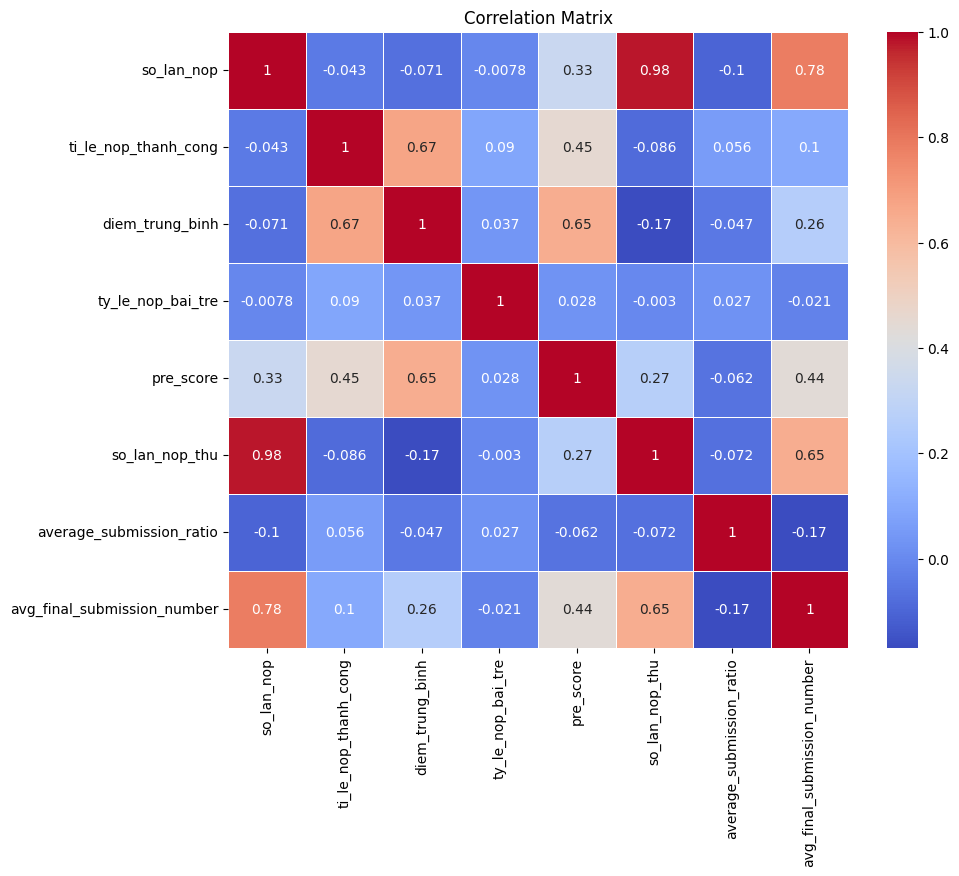

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

new_df = merged_df.copy()
new_df.drop(columns=['username'],inplace=True)
# Tính ma trận tương quan
corr_matrix = new_df.corr()

# Vẽ biểu đồ tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# Tạo tập train và tập test

In [105]:
#score = pd.read_excel("/content/drive/MyDrive/ML/NMLT/tbtl-public.ods", engine='odf')
score = pd.read_csv("/content/drive/MyDrive/ML/NMLT/th-public.csv")
score

,hash,TH
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,5
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,8.5
2,01122b3ef7e59b84189e65985305f575d6bdf83c,7
3,013de369c439ab0ead8aa7da64423aa395a8be39,10
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,6
...,...,...
756,840d07858c03f80f4695056e2cc7d0c474b83a25,6
757,844f5db2e7e31ae51eba025480679ed7e4708ac6,8.5
758,845acd04a77b3d1b623f255d9f9f8eae90892dab,5.5
759,8460eaaf887a6289fb156f7562fb739ba8e9629e,10


In [106]:
merged_df = pd.merge(merged_df,score , how='left',left_on="username",right_on='hash')#right_on='username')
#merged_df.drop(columns=['username'],inplace=True)
merged_df.drop(columns=['hash'],inplace=True)
merged_df

,username,so_lan_nop,ti_le_nop_thanh_cong,diem_trung_binh,ty_le_nop_bai_tre,pre_score,so_lan_nop_thu,average_submission_ratio,avg_final_submission_number,TH
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,147,0.809524,5504.149660,0.000000,10000.000000,101.0,0.002048,46.0,5
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,259,0.806950,5488.552124,0.000000,9647.423077,181.0,0.002319,78.0,8.5
2,01122b3ef7e59b84189e65985305f575d6bdf83c,195,0.897436,5973.753846,0.000000,9391.253731,128.0,0.060149,67.0,7
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,100,0.760000,5952.760000,0.000000,10000.000000,53.0,0.000886,47.0,NaN
4,013de369c439ab0ead8aa7da64423aa395a8be39,107,0.878505,6474.448598,2.803738,9176.151515,41.0,0.001457,66.0,10
...,...,...,...,...,...,...,...,...,...,...
1484,feb8a2859a011c59efd22ed419cb69288fe03627,74,0.959459,5581.081081,0.000000,10000.000000,40.0,0.043319,34.0,NaN
1485,fef4a3263ed9a8ab14d457694bb8fd86ccd98312,260,0.830769,6204.557692,0.000000,9730.769231,182.0,0.028905,78.0,NaN
1486,ff12d6e2ab80696ed8e22fbe5497e96c68d29076,437,0.823799,4998.466819,0.000000,9943.980583,334.0,0.002176,103.0,NaN
1487,ff3fa2ec64294f37ae968159f810ebeda7966c51,94,0.787234,4343.329787,0.000000,9230.088235,60.0,0.002121,34.0,NaN


In [107]:
X_train = merged_df.dropna(subset=['TH'])#['TBTL'])

# Tạo mặt nạ cho các record có giá trị NaN trong cột điểm TH
mask =  merged_df['TH'].isna()#merged_df['TBTL'].isna()

# Tách các record có giá trị NaN trong cột điểm TH thành tập X_test
X_test = merged_df[mask]

In [108]:
X_train

,username,so_lan_nop,ti_le_nop_thanh_cong,diem_trung_binh,ty_le_nop_bai_tre,pre_score,so_lan_nop_thu,average_submission_ratio,avg_final_submission_number,TH
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,147,0.809524,5504.149660,0.000000,10000.000000,101.0,0.002048,46.0,5
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,259,0.806950,5488.552124,0.000000,9647.423077,181.0,0.002319,78.0,8.5
2,01122b3ef7e59b84189e65985305f575d6bdf83c,195,0.897436,5973.753846,0.000000,9391.253731,128.0,0.060149,67.0,7
4,013de369c439ab0ead8aa7da64423aa395a8be39,107,0.878505,6474.448598,2.803738,9176.151515,41.0,0.001457,66.0,10
5,014c59c6433fd764a0b08de6ffeb757eaf60aa73,199,0.773869,5240.025126,0.000000,8844.444444,109.0,0.001203,90.0,6
...,...,...,...,...,...,...,...,...,...,...
796,840d07858c03f80f4695056e2cc7d0c474b83a25,111,0.729730,5171.639640,0.000000,9409.090909,67.0,0.001271,44.0,6
797,844f5db2e7e31ae51eba025480679ed7e4708ac6,357,0.711485,4785.224090,0.000000,9921.596154,253.0,0.004650,104.0,8.5
798,845acd04a77b3d1b623f255d9f9f8eae90892dab,155,0.754839,4247.296774,0.000000,9069.169811,102.0,0.001100,53.0,5.5
799,8460eaaf887a6289fb156f7562fb739ba8e9629e,557,0.746858,4278.605027,0.000000,9617.391304,442.0,0.006799,115.0,10


In [109]:
y_train = X_train.pop('TH')#pop('TBTL')

# Hiển thị tên các cột còn lại trong X_train
X_train

,username,so_lan_nop,ti_le_nop_thanh_cong,diem_trung_binh,ty_le_nop_bai_tre,pre_score,so_lan_nop_thu,average_submission_ratio,avg_final_submission_number
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,147,0.809524,5504.149660,0.000000,10000.000000,101.0,0.002048,46.0
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,259,0.806950,5488.552124,0.000000,9647.423077,181.0,0.002319,78.0
2,01122b3ef7e59b84189e65985305f575d6bdf83c,195,0.897436,5973.753846,0.000000,9391.253731,128.0,0.060149,67.0
4,013de369c439ab0ead8aa7da64423aa395a8be39,107,0.878505,6474.448598,2.803738,9176.151515,41.0,0.001457,66.0
5,014c59c6433fd764a0b08de6ffeb757eaf60aa73,199,0.773869,5240.025126,0.000000,8844.444444,109.0,0.001203,90.0
...,...,...,...,...,...,...,...,...,...
796,840d07858c03f80f4695056e2cc7d0c474b83a25,111,0.729730,5171.639640,0.000000,9409.090909,67.0,0.001271,44.0
797,844f5db2e7e31ae51eba025480679ed7e4708ac6,357,0.711485,4785.224090,0.000000,9921.596154,253.0,0.004650,104.0
798,845acd04a77b3d1b623f255d9f9f8eae90892dab,155,0.754839,4247.296774,0.000000,9069.169811,102.0,0.001100,53.0
799,8460eaaf887a6289fb156f7562fb739ba8e9629e,557,0.746858,4278.605027,0.000000,9617.391304,442.0,0.006799,115.0


In [110]:
y_train

0        5
1      8.5
2        7
4       10
5        6
      ... 
796      6
797    8.5
798    5.5
799     10
800    1.5
Name: TH, Length: 755, dtype: object

In [111]:
X_train = X_train.values
y_train = y_train.values

In [112]:
print(X_train)

[['00b6dd4fc7eb817e03708c532016ef30ce564a61' 147 0.8095238095238095 ...
  101.0 0.0020478620955471168 46.0]
 ['00bef8afee8f3c595d535c9c03c490cac1a4f021' 259 0.806949806949807 ...
  181.0 0.0023194961924878823 78.0]
 ['01122b3ef7e59b84189e65985305f575d6bdf83c' 195 0.8974358974358975 ...
  128.0 0.06014859401720261 67.0]
 ...
 ['845acd04a77b3d1b623f255d9f9f8eae90892dab' 155 0.7548387096774194 ...
  102.0 0.0011000510653219884 53.0]
 ['8460eaaf887a6289fb156f7562fb739ba8e9629e' 557 0.7468581687612208 ...
  442.0 0.006799417521349991 115.0]
 ['8481a7f00c3d30473b01a8a3cff2564948d24902' 54 0.6481481481481481 ...
  30.0 0.0008899434702730565 24.0]]


In [113]:
print(y_train)

['5' '8.5' '7' '10' '6' '7.5' '8' '8.5' '7.5' '5.5' '10' '8.5' '9' '5.5'
 '5' '7.5' '7.5' '6.5' '9' '10' '7.5' '8' '8' '5' '10' '7.5' '6.5' '9.5'
 '8.5' '5' '4.5' '8' '5.5' '10' '6.5' '9.5' '4.5' '9.5' '8.5' '8.5' '7.5'
 '6' '9.5' '8.5' '9.5' '4' '8.5' '8.5' '6' '5.5' '8' '8' '8.5' '4' '9.5'
 '2.5' '8' '9.5' '9.5' '9' '9' '5' '8' '7.5' '9' '7.5' '10' '4.5' '3.5'
 '7' '8' '1' '9.5' '6' '4.5' '7' '10' '10' '9.5' '9.5' '6.5' '4.5' '8' '8'
 '1' '6' '9' '7' '9.5' '6' '7.5' '10' '5.5' '7.5' '1.5' '6.5' '2' '8.5'
 '9' '7' '6' '8.5' '8.5' '8' '8' '9' '1' '9.5' '4.5' '6.5' '9' '0.5' '10'
 '9' '9' '7' '9.5' '10' '9' '4.5' '5.5' '10' '9.5' '9' '5' '6.5' '9' '9.5'
 '8' '5' '7.5' '5' '5' '4.5' '9.5' '6.5' '4' '6' '8' '4.5' '8' '4' '9' '9'
 '8' '8.5' '8' '9' '6.5' '10' '9.5' '5' '5' '9.5' '5' '6' '8' '7' '10' '9'
 '7.5' '10' '4.5' '5' '10' '3.5' '7.5' '9.5' '5' '6.5' '8.5' '9.5' '8' '9'
 '9' '8.5' '8' '5' '4.5' '8' '9.5' '6.5' '8' '9.5' '8' '5.5' '9.5' '9.5'
 '7.5' '1' '9.5' '4.5' '8' '4.5' '8' '9' 

In [114]:
# indices = np.where(y_train == '\xa0' )[0]
# print(indices)

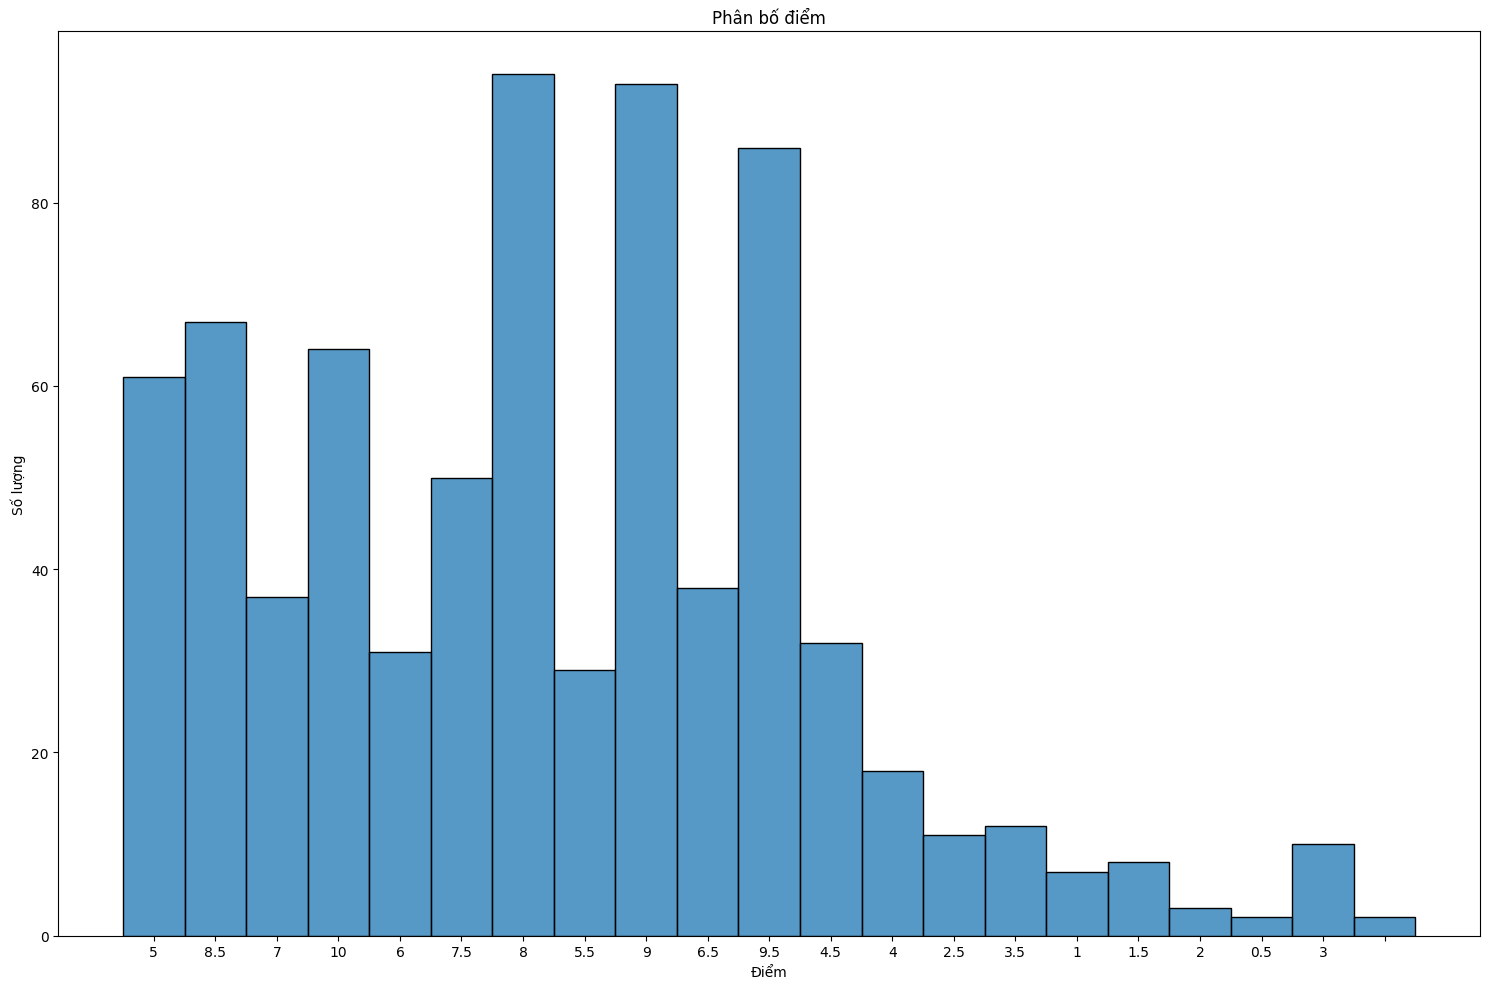

In [115]:
plt.figure(figsize=(15, 10))

# Lặp qua từng cột trong DataFrame


sns.histplot(y_train, kde=False)
plt.title("Phân bố điểm")
plt.xlabel("Điểm")
plt.ylabel("Số lượng")

plt.tight_layout()
plt.show()

In [116]:
# Một số giá trị trong tập train có giá trị lỗi => gán bằng 0
y_train = np.where(y_train == '\xa0', '0', y_train)

In [117]:
y_train = y_train.astype(float)

In [118]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(755, 9)
(755,)
(734, 10)


# Chia tập train, test

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [120]:
X_train_new = np.delete(X_train, 0, axis=1)
X_train_new

array([[144, 0.7638888888888888, 5757.472222222223, ..., 62.0,
        0.0008347363044010404, 82.0],
       [19, 0.8947368421052632, 4526.315789473684, ..., 9.0,
        0.0006684114616035892, 10.0],
       [51, 0.7254901960784313, 1764.7058823529412, ..., 39.0,
        0.03257605175490509, 12.0],
       ...,
       [120, 0.3333333333333333, 550.0, ..., 55.0, 0.0019527909540053624,
        65.0],
       [268, 0.9440298507462687, 5798.962686567164, ..., 193.0,
        0.015107859788255127, 75.0],
       [291, 0.711340206185567, 4519.560137457044, ..., 200.0,
        0.0015235892396554293, 91.0]], dtype=object)

In [121]:
print(X_train_new.shape)

(604, 8)


In [122]:
X_valid_new = np.delete(X_valid, 0, axis=1)
X_valid_new

array([[361, 0.703601108033241, 3969.836565096953, ..., 276.0,
        0.005067600399212286, 85.0],
       [250, 0.784, 5899.524, ..., 145.0, 0.0015910795853896857, 105.0],
       [195, 0.8358974358974359, 6179.446153846154, ..., 115.0,
        0.002048743597982283, 80.0],
       ...,
       [314, 0.8980891719745223, 5345.977707006369, ..., 201.0,
        0.0025918490668107854, 113.0],
       [455, 0.865934065934066, 5525.178021978022, ..., 337.0,
        0.006579996344213591, 118.0],
       [36, 0.4166666666666667, 3118.027777777778, ..., 27.0,
        0.009859670022753233, 9.0]], dtype=object)

In [123]:
print(X_valid_new.shape)

(151, 8)


 Scale dữ liệu

In [124]:
from sklearn.preprocessing import StandardScaler

# Khởi tạo scaler
scaler = StandardScaler()

# Chuẩn hóa dữ liệu
X_train_new = scaler.fit_transform(X_train_new)
X_valid_new = scaler.transform(X_valid_new)


# Chuẩn bị model

In [125]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras import regularizers
from sklearn.metrics import mean_squared_error, r2_score

In [126]:
!pip install xgboost
!pip install lightgbm
!pip install catboost

In [127]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

GridSearchCV một số model phổ biến.

In [128]:
# # Tạo dictionary chứa các model và tham số cần search
# models = {
#     'LinearRegression': (LinearRegression(), {}),
#     'Ridge': (Ridge(), {'alpha': [0.1, 1.0, 10.0]}),
#     'Lasso': (Lasso(), {'alpha': [0.1, 1.0, 10.0]}),
#     'ElasticNet': (ElasticNet(), {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.9]}),
#     'SVR': (SVR(), {'C': [0.1, 1.0, 10.0], 'kernel': ['linear', 'rbf']}),
#     'DecisionTree': (DecisionTreeRegressor(), {'max_depth': [None, 10, 20, 30]}),
#     'RandomForest': (RandomForestRegressor(), {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}),
#     'GradientBoosting': (GradientBoostingRegressor(), {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.01]}),
#     'XGBRegressor': (XGBRegressor(), {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.01]}),
#     'LGBMRegressor': (LGBMRegressor(), {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.01]}),
#     'CatBoostRegressor': (CatBoostRegressor(), {'iterations': [100, 200], 'learning_rate': [0.1, 0.01]}),
#     'AdaBoost': (AdaBoostRegressor(), {'n_estimators': [50, 100]}),
#     'KNN': (KNeighborsRegressor(), {'n_neighbors': [3, 5, 7]}),
#     'MLP': (MLPRegressor(), {'hidden_layer_sizes': [(100,), (50, 50)], 'alpha': [0.0001, 0.001]})
# }


# # Duyệt qua từng model và thực hiện GridSearchCV
# for name, (model, params) in models.items():
#     print(f"Training {name}...")
#     grid_search = GridSearchCV(model, params, cv=5, n_jobs=-1, scoring='r2')
#     grid_search.fit(X_train_new, y_train)
#     best_model = grid_search.best_estimator_
#     y_pred = best_model.predict(X_valid_new)

#     mse = mean_squared_error(y_valid, y_pred)
#     r2 = r2_score(y_valid, y_pred)

#     print(f"Best params for {name}: {grid_search.best_params_}")
#     print(f"MSE for {name}: {mse}")
#     print(f"R2 for {name}: {r2}\n")

## CNN


In [129]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

Epoch 1/500
10/10 [==============================] - 2s 50ms/step - loss: 59.3471 - val_loss: 60.2865
Epoch 2/500
10/10 [==============================] - 0s 7ms/step - loss: 56.3371 - val_loss: 58.7347
Epoch 3/500
10/10 [==============================] - 0s 18ms/step - loss: 55.5069 - val_loss: 57.5602
Epoch 4/500
10/10 [==============================] - 0s 24ms/step - loss: 54.3169 - val_loss: 56.2609
Epoch 5/500
10/10 [==============================] - 0s 18ms/step - loss: 53.7824 - val_loss: 55.0775
Epoch 6/500
10/10 [==============================] - 0s 14ms/step - loss: 52.1248 - val_loss: 53.7736
Epoch 7/500
10/10 [==============================] - 0s 13ms/step - loss: 51.7911 - val_loss: 52.6911
Epoch 8/500
10/10 [==============================] - 0s 13ms/step - loss: 50.5592 - val_loss: 51.6447
Epoch 9/500
10/10 [==============================] - 0s 28ms/step - loss: 49.9300 - val_loss: 50.6727
Epoch 10/500
10/10 [==============================] - 0s 16ms/step - loss: 48.8000 

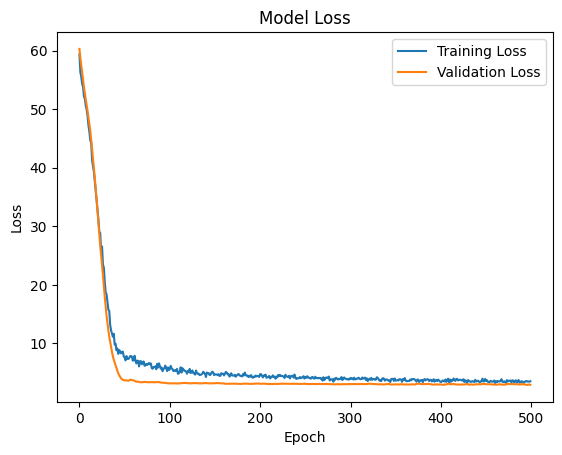

In [130]:
# Khởi tạo mô hình
model = tf.keras.Sequential([
    Dense(128, activation='relu', input_shape=(X_train_new.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(1)
])

# Biên dịch mô hình
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

# Huấn luyện mô hình
history = model.fit(X_train_new, y_train, epochs=500, batch_size=64, validation_data=(X_valid_new, y_valid), verbose=1)

# Dự đoán
y_pred = model.predict(X_valid_new)

# Tính toán MSE và R2
mse = mean_squared_error(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)
print("MSE on validation set: ", mse)
print("R2: ", r2)

# Vẽ biểu đồ lịch sử huấn luyện
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Random Forest

In [131]:
# from sklearn.ensemble import RandomForestRegressor
# from tensorflow.keras.layers import BatchNormalization
# from tensorflow.keras.layers import Dropout
# from tensorflow.keras.regularizers import l2
# import tensorflow as tf
# from sklearn.model_selection import KFold
# from tensorflow.keras.optimizers import Adam
# from sklearn.ensemble import RandomForestRegressor

In [132]:
# param_grid = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth': [None, 10, 20, 30, 40, 50],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }
# #Giả sử X là DataFrame chứa các feature và y là Series chứa nhãn
# rf = RandomForestRegressor()
# # Tạo GridSearchCV
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# # Thực hiện GridSearchCV để tìm tham số tốt nhất
# grid_search.fit(X_train_new, y_train)

# # In ra các tham số tốt nhất
# print("Best parameters found: ", grid_search.best_params_)

# # Dự đoán trên tập kiểm tra
# y_pred = grid_search.best_estimator_.predict(X_valid_new)

# # Đánh giá mô hình
# mse = mean_squared_error(y_valid, y_pred)
# r2 = r2_score(y_valid, y_pred)

# print("Mean Squared Error: ", mse)
# print("R^2 Score: ", r2)

In [133]:

# #model = RandomForestRegressor(max_depth= 8, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 700, random_state=42)
# model = RandomForestRegressor(bootstrap=True, max_depth= 40, max_features ='sqrt', min_samples_leaf= 1, min_samples_split= 5, n_estimators=100)
# # model.fit(X_train_new, y_train)


# y_pred = model.predict(X_valid_new)
# mse = mean_squared_error(y_valid, y_pred)
# r2 = r2_score(y_valid, y_pred)
# print("MSE on test set: ", mse)
# print(f"R2: ",r2)


## SVR

In [134]:
# from sklearn.svm import SVR

In [135]:
# # Define the parameter grid
# param_grid = {
#     'C': [5,7,10,15],#[0.001, 1, *5*, 200, 500][0.1, #1#, 10, 100]
#     'epsilon': [1, 5, 10], #[0.01, 0.1, #1#, 5, 10],
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'degree': [2, 1, 5, 10],  # Only used for 'poly' kernel  [*2*, 3, 4],
#     'gamma': ['scale', 'auto']  # Used for 'rbf', 'poly' and 'sigmoid' kernels
# }

# # Create and configure GridSearchCV
# svr = SVR()
# grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)

# # Fit GridSearchCV
# grid_search.fit(X_train_new, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_
# print(f"Best parameters: {best_params}")

# # Evaluate the model on the test set
# y_pred = grid_search.predict(X_valid_new)

# # Tính toán MSE và R2
# mse = mean_squared_error(y_valid, y_pred)
# r2 = r2_score(y_valid, y_pred)
# print("MSE on validation set: ", mse)
# print("R2: ", r2)

# # Vẽ biểu đồ lịch sử huấn luyện
# import matplotlib.pyplot as plt

# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()


In [136]:
## Tạo model
# svr = SVR(C= 8, degree= 2, epsilon= 1, gamma= 'auto', kernel= 'rbf')
# svr.fit(X_train_new, y_train)

# y_pred = svr.predict(X_valid_new)
# mse = mean_squared_error(y_valid, y_pred)
# r2 = r2_score(y_valid, y_pred)
# print("MSE on test set: ", mse)
# print(f"R2: ",r2)


## KNN

In [137]:
# from sklearn.neighbors import KNeighborsRegressor

In [138]:
# # Define the parameter grid
# param_grid = {
#     'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
#     'weights': ['uniform', 'distance'],
#     'metric': ['euclidean', 'manhattan', 'minkowski']
# }

# # Create and configure GridSearchCV
# knn = KNeighborsRegressor()
# grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)

# # Fit GridSearchCV
# grid_search.fit(X_train_new, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_
# print(f"Best parameters: {best_params}")

# # Evaluate the model on the test set
# y_pred = grid_search.predict(X_valid_new)
# mse = mean_squared_error(y_valid, y_pred)
# print(f"MSE on test set: {mse}")

In [139]:
# model_knn=KNeighborsRegressor(metric = 'euclidean', n_neighbors= 15, weights='uniform')
# model_knn.fit(X_train_new, y_train)

## CatBoost

In [140]:
# from catboost import CatBoostRegressor

In [141]:
# model = CatBoostRegressor(verbose=0)

# # Định nghĩa các tham số cho GridSearchCV
# param_grid = {
#     'iterations': [200, 250, 400, 500],
#     'depth': [7,8,9],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'l2_leaf_reg': [5,7,9]
# }

# # GridSearchCV
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)
# grid_result = grid_search.fit(X_train_new, y_train)

# # In kết quả
# print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

# # Evaluate the model on the test set
# y_pred = grid_search.predict(X_valid_new)
# mse = mean_squared_error(y_valid, y_pred)
# print(f"MSE on test set: {mse}")

In [142]:
# model = CatBoostRegressor(iterations=200, learning_rate=0.1,depth=8, l2_leaf_reg=7 )
# model.fit(X_train_new, y_train)

# Dự đoán trên tập test và lưu kết quả

In [143]:
print(X_test)

                                      username  so_lan_nop  \
3     0134f9f410c65ad0e8c2254a7e9288670e02a183         100   
20    035f97702f2c01d26ab1fae8f39ea2f98a0caa3c         144   
40    06024da8147b5cf6105beb4c403f67cf1ff0aea1           8   
68    0aaebc88f6106684d6993c156104c1ef36cf94e0         192   
80    0bf111a9caedf02804f6991792490e63bc21058a         199   
...                                        ...         ...   
1484  feb8a2859a011c59efd22ed419cb69288fe03627          74   
1485  fef4a3263ed9a8ab14d457694bb8fd86ccd98312         260   
1486  ff12d6e2ab80696ed8e22fbe5497e96c68d29076         437   
1487  ff3fa2ec64294f37ae968159f810ebeda7966c51          94   
1488  ffe872165621d735a48bb5db0c71dd5195cba359         399   

      ti_le_nop_thanh_cong  diem_trung_binh  ty_le_nop_bai_tre     pre_score  \
3                 0.760000      5952.760000                0.0  10000.000000   
20                0.715278      5035.763889                0.0  10000.000000   
40             

In [144]:
X_test_new = X_test.drop(columns=['TH'])#['TBTL'])
X_test_new

,username,so_lan_nop,ti_le_nop_thanh_cong,diem_trung_binh,ty_le_nop_bai_tre,pre_score,so_lan_nop_thu,average_submission_ratio,avg_final_submission_number
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,100,0.760000,5952.760000,0.0,10000.000000,53.0,0.000886,47.0
20,035f97702f2c01d26ab1fae8f39ea2f98a0caa3c,144,0.715278,5035.763889,0.0,10000.000000,94.0,0.001201,50.0
40,06024da8147b5cf6105beb4c403f67cf1ff0aea1,8,1.000000,6778.750000,0.0,10000.000000,3.0,0.001368,5.0
68,0aaebc88f6106684d6993c156104c1ef36cf94e0,192,0.776042,4065.369792,0.0,10000.000000,142.0,0.001331,50.0
80,0bf111a9caedf02804f6991792490e63bc21058a,199,0.884422,6355.753769,0.0,9769.402439,117.0,0.006358,82.0
...,...,...,...,...,...,...,...,...,...
1484,feb8a2859a011c59efd22ed419cb69288fe03627,74,0.959459,5581.081081,0.0,10000.000000,40.0,0.043319,34.0
1485,fef4a3263ed9a8ab14d457694bb8fd86ccd98312,260,0.830769,6204.557692,0.0,9730.769231,182.0,0.028905,78.0
1486,ff12d6e2ab80696ed8e22fbe5497e96c68d29076,437,0.823799,4998.466819,0.0,9943.980583,334.0,0.002176,103.0
1487,ff3fa2ec64294f37ae968159f810ebeda7966c51,94,0.787234,4343.329787,0.0,9230.088235,60.0,0.002121,34.0


In [145]:
X_test_new = X_test_new.values
X_test_new = np.delete(X_test_new, 0, axis=1)
X_test_new

array([[100, 0.76, 5952.76, ..., 53.0, 0.0008864637824595676, 47.0],
       [144, 0.7152777777777778, 5035.763888888889, ..., 94.0,
        0.001200752616801145, 50.0],
       [8, 1.0, 6778.75, ..., 3.0, 0.0013675113808355479, 5.0],
       ...,
       [437, 0.8237986270022883, 4998.466819221968, ..., 334.0,
        0.002175962368060999, 103.0],
       [94, 0.7872340425531915, 4343.329787234043, ..., 60.0,
        0.0021209152586044782, 34.0],
       [399, 0.8796992481203008, 6353.769423558897, ..., 303.0,
        0.0016780054335785955, 96.0]], dtype=object)

In [146]:
print(X_test_new.shape)

(734, 8)


In [147]:
X_test_new = scaler.transform(X_test_new)

Dự đoán điểm

In [148]:
result = model.predict(X_test_new)

23/23 [==============================] - 0s 1ms/step


In [149]:
print(result.shape)

(734, 1)


Làm tròn điểm

In [150]:
# for i in range(len(result)):
#   if result[i] != 10:
#     if result[i] - int(result[i]) <= 0.5:
#       result[i] = int(result[i])
#     elif result[i] - int(result[i]) <=0.75:
#       result[i] = int(result[i]) + 0.5
#     else:
#       result[i] = int(result[i]) + 1
# result

In [151]:
df_res = pd.DataFrame(result, columns=['TH'])
df_res

,TH
0,6.717661
1,7.058499
2,5.296346
3,6.554922
4,8.537388
...,...
729,7.834490
730,8.457619
731,8.440348
732,4.396125


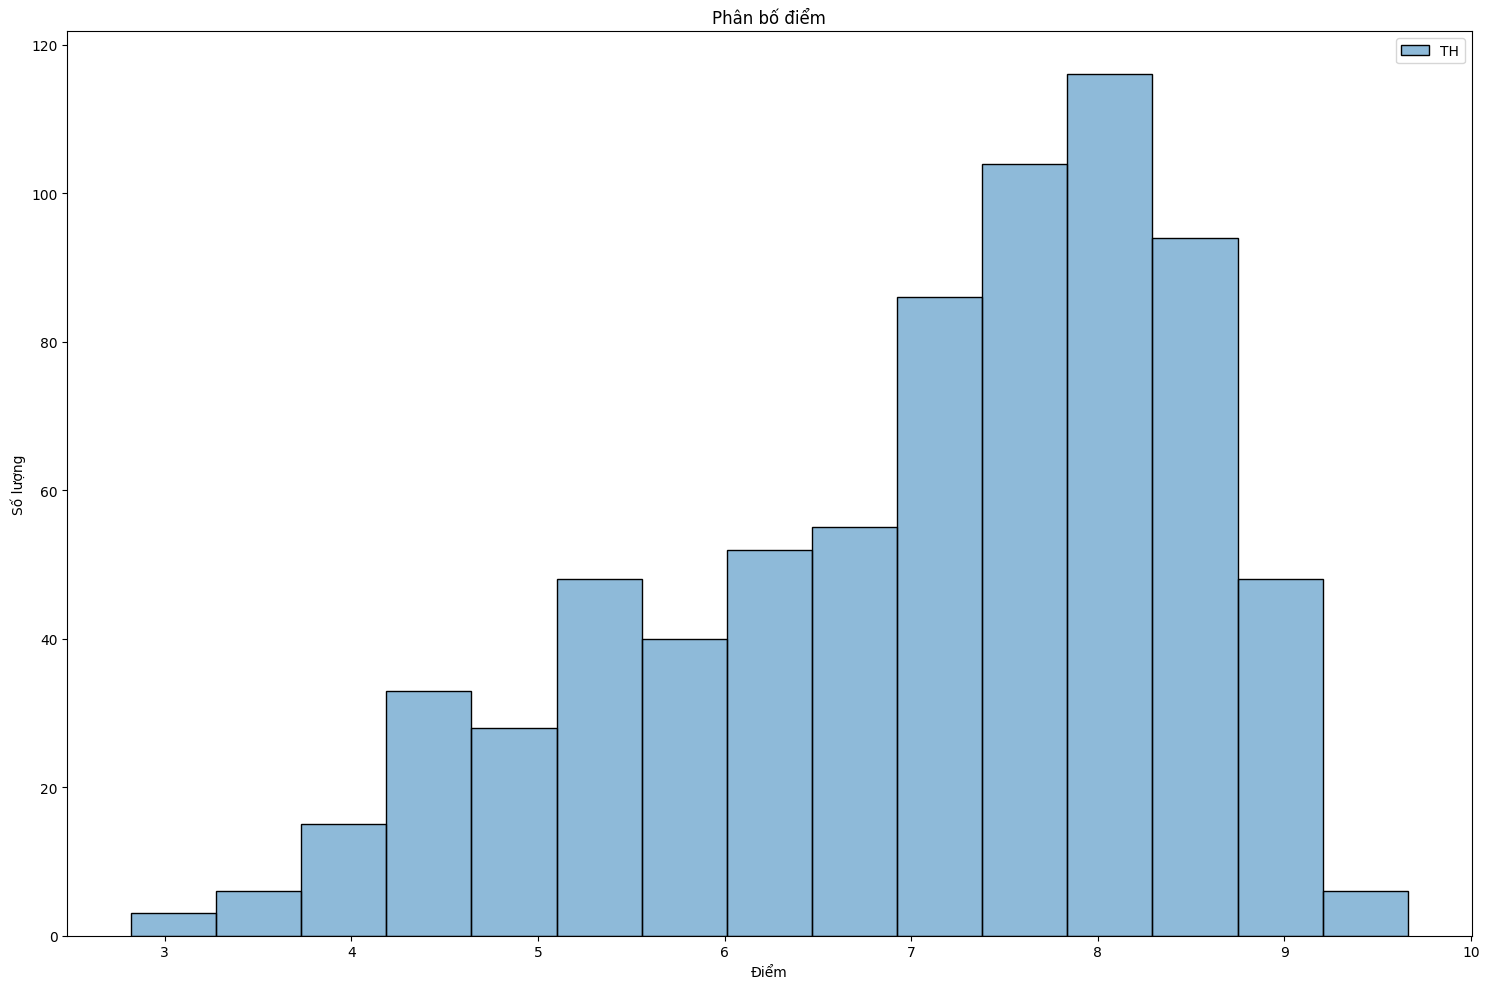

In [152]:
plt.figure(figsize=(15, 10))

# Lặp qua từng cột trong DataFrame
sns.histplot(df_res, kde=False)
plt.title("Phân bố điểm")
plt.xlabel("Điểm")
plt.ylabel("Số lượng")

plt.tight_layout()
plt.show()

In [153]:
#Tạo bảng mssv
mssv = X_test["username"].unique()
df_mssv = pd.DataFrame(mssv, columns=['mssv'])
df_mssv

,mssv
0,0134f9f410c65ad0e8c2254a7e9288670e02a183
1,035f97702f2c01d26ab1fae8f39ea2f98a0caa3c
2,06024da8147b5cf6105beb4c403f67cf1ff0aea1
3,0aaebc88f6106684d6993c156104c1ef36cf94e0
4,0bf111a9caedf02804f6991792490e63bc21058a
...,...
729,feb8a2859a011c59efd22ed419cb69288fe03627
730,fef4a3263ed9a8ab14d457694bb8fd86ccd98312
731,ff12d6e2ab80696ed8e22fbe5497e96c68d29076
732,ff3fa2ec64294f37ae968159f810ebeda7966c51


In [154]:
# Ghép tạo bảng kết quả
final_res = pd.concat([df_mssv, df_res], axis=1)
final_res

,mssv,TH
0,0134f9f410c65ad0e8c2254a7e9288670e02a183,6.717661
1,035f97702f2c01d26ab1fae8f39ea2f98a0caa3c,7.058499
2,06024da8147b5cf6105beb4c403f67cf1ff0aea1,5.296346
3,0aaebc88f6106684d6993c156104c1ef36cf94e0,6.554922
4,0bf111a9caedf02804f6991792490e63bc21058a,8.537388
...,...,...
729,feb8a2859a011c59efd22ed419cb69288fe03627,7.834490
730,fef4a3263ed9a8ab14d457694bb8fd86ccd98312,8.457619
731,ff12d6e2ab80696ed8e22fbe5497e96c68d29076,8.440348
732,ff3fa2ec64294f37ae968159f810ebeda7966c51,4.396125


In [155]:
# Lưu lại file
final_res.to_csv('merged_data.csv', index=False)